> **Project Title:** Churn Prediction<br>
> **Project Owner:** David Adarkwah<br>
> **Email:** davidwyse48@gmail.com<br>
> **Github Profile:** [Github](github.com/Adark-Amal)<br>
> **LinkedIn Profile:** [LinkedIn](https://www.linkedin.com/in/d-adark/)

## Table of Contents <a id='mu'></a>

* [Business Problem Understanding](#bpu)
    * [Problem Statement](#ps)
    * [Project Goal](#pg)
    * [Data Description](#dd)
    * [Methodology](#my)
* [Data Preparation](#dp)
* [Exploratory Data Analysis](#eda) 
* [Feature Engineering](#fe) 
* [Modeling](#dm)
* [Conclusion and Recommendation](#cr)
* [References](#r)

## 1. Business Problem Understanding<a id='bpu'></a>

[Move Up](#mu)

<p style="text-align:justify;">The initial stage in solving a data science problem is comprehending the problem at hand. This step is crucial as it enables us to identify the decisions we need to make, the data required to inform those decisions, and the analysis needed to arrive at them. Essentially, constructing a mental model of the problem helps us efficiently organize the relevant information necessary to solve the problem.</p>

### 1.1 Problem Statement <a id='ps'></a>

Our digital music service, similar to Spotify or Pandora, faces the challenge of user churn. Users either enjoy our free tier with advertisements between songs or subscribe to our premium plan, which offers an ad-free experience for a monthly fee. Users have the flexibility to upgrade, downgrade, or cancel their service at any time. Recognizing users who are at risk of churning – whether by downgrading from premium or canceling their service entirely – is crucial for our business. Identifying these users in advance allows us to offer incentives and discounts, potentially saving millions in revenue.

### 1.2 Project Goal <a id='pg'></a>

The primary objectives of this project are:

1. **Identify Churn Risk:** Develop a predictive model that can identify users at risk of churning from our digital music service based on their interactions.

2. **Retain Users:** Proactively target and retain users who are likely to downgrade from premium or cancel their service, potentially saving revenue and maintaining customer satisfaction.

3. **Select Optimal Model:** Evaluate and select the best-performing model based on the F1 score, considering the class imbalance, to guide churn prediction efforts effectively.

4. **Preliminary analysis:** Perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned.

### 1.3 Data Description <a id='dd'></a>

The dataset contains user activity logs from a digital music service similar to Spotify or Pandora. It comprises various user interactions and events while using the service. Key events include:

- **Cancel**: Users cancel their service.
- **Submit Downgrade**: Users request a downgrade from a premium plan.
- **Thumbs Down**: Users give a thumbs-down rating to a song.
- **Home**: Users visit the homepage.
- **Downgrade**: Users perform a downgrade.
- **Roll Advert**: Users encounter advertisements.
- **Logout**: Users log out of their accounts.
- **Save Settings**: Users save their settings.
- **Cancellation Confirmation**: Confirmation of user service cancellation.
- **About**: Users visit the "About" section.
- **Submit Registration**: Users submit registration.
- **Settings**: Users access their account settings.
- **Login**: Users log into their accounts.
- **Register**: Users register for the service.
- **Add to Playlist**: Users add songs to their playlists.
- **Add Friend**: Users add friends to their network.
- **NextSong**: Users play the next song.
- **Thumbs Up**: Users give a thumbs-up rating to a song.
- **Help**: Users seek help or support.
- **Upgrade**: Users upgrade their service to premium.

The primary objective is to predict user churn based on events such as "Submit Downgrade" or "Cancellation Confirmation." This dataset plays a crucial role in understanding user behavior and building predictive models to effectively retain customers.


### 1.4 Methodology <a id='my'></a>

<p style="text-align:justify;">The methodology that will be used for our project will largely depend on the goals we set out to achieve. The methodlogy framework below gives us a comprehensive guide on the methodology apparoach that will help us achieve our goals.</p>
<br>
<p style="text-align:center;font-weight:bold;font-size:20px"> Methodology Framework</p>
<br>
<div style='justify-content: center;text-align:center;'>
<img src='https://artofdatablog.files.wordpress.com/2017/10/methodology-map.jpg' style="float:center;width:700px;">
</div>
Once we have the data, we would need to engineer features based on the data that we obtain, and build a model suitable for binary classification (Logistic Regression, Random Forest, Gradient Boosting), picking the most appropriate model based on the tradeoff between the complexity, the understanding, and the error margin.

## 2. Data Preparation <a id='dp'></a>

[Move Up](#mu)

An understanding of the data coupled with problem understanding will help us in cleaning and preparing our data for analysis. It is usually rare to acquire a ready-to-use data for any analysis without some level of preparation. To prepare our data, we normally assess the quality of the data, cleanse, format, blend and sample the data since we may encounter various issues with columns in our data. These issues may include:

* **`Missing values:`** meaning column values are incomplete
* **`Incorrect data:`** meaning you see values not expected for the column name
* **`Inconsistent values:`** meaning some values may fall outside the expected range
* **`Duplicate values:`** meaning whether or not there are duplicate values
* **`Inconsistent data type:`** meaning values entered in the columns may not be consistent with the column names

In [1]:
# Import libraries

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import isnan, count, when, col, desc, udf, col, sort_array, asc, avg
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.window import Window
from pyspark.sql import Row
from pyspark.sql import functions as F
from pyspark.sql.functions import *

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, LinearSVC, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import CountVectorizer, IDF, PCA, RegexTokenizer, VectorAssembler, Normalizer, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import datetime
import time

import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Create a Spark session

spark = SparkSession \
    .builder \
    .appName("Adark Sparkify") \
    .getOrCreate()

In [3]:
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1707253833040'),
 ('spark.app.name', 'Adark Sparkify'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.port', '42605'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.host',
  '37968439766b5dbdcc745cf8d4b84fcf77bad631-6cbd446695-vjbv8')]

### 2.1 Data Cleaning and Preprocessing <a id='dqa'></a>
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

In [4]:
# load in the dataset

df = spark.read.json("mini_sparkify_event_data.json")

In [5]:
# print the schema

df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



> Data type is predominantly string with a few double and long numeric data types

In [6]:
# Show first 2 rows in the data

df.show(2)

+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+---------+------+-------------+--------------------+------+
|          artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|     song|status|           ts|           userAgent|userId|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+---------+------+-------------+--------------------+------+
|  Martha Tilston|Logged In|    Colin|     M|           50| Freeman|277.89016| paid|     Bakersfield, CA|   PUT|NextSong|1538173362000|       29|Rockpools|   200|1538352117000|Mozilla/5.0 (Wind...|    30|
|Five Iron Frenzy|Logged In|    Micah|     M|           79|    Long|236.09424| free|Boston-Cambridge-...|   PUT|NextSong|1538331630000|        8|   Canada|   200|1538352180000|"Moz

In [7]:
# get the count of the dataset before we do any cleaning - this is 286500

df.count()

286500

> The data in its raw form contains 286500 records

Now we will inspect the data for any missing data and duplicate data.

In [8]:
# Dropping row with missing user_id and session_id

df = df.dropna(how = 'any', subset = ["userId", "sessionId"])

In [9]:
df.count()

286500

> From the output we can tell there were no missing values pertaining to session_id and user_id

In [10]:
# Check for duplicate values

df.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|100001|
|100002|
|100003|
|100004|
|100005|
|100006|
|100007|
|100008|
|100009|
|100010|
|100011|
|100012|
|100013|
|100014|
|100015|
|100016|
|100017|
+------+
only showing top 20 rows



> From the output above, we can see that there are user_ids which are represented as empty strings. We would have to drop this as userid needs to be available for uniqueness of data.

Before dropping empty userids, lets inspect the sessionid too.

In [11]:
df.select("sessionId").dropDuplicates().sort("sessionId").show()

+---------+
|sessionId|
+---------+
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
|        7|
|        8|
|        9|
|       10|
|       11|
|       12|
|       13|
|       15|
|       16|
|       17|
|       18|
|       19|
|       20|
|       21|
+---------+
only showing top 20 rows



> We can see that there are no missing values in the sessionid column.

Now lets go ahead and drop all the empty string userids.

In [12]:
df = df.filter(df["userId"] != "")

In [13]:
df.count()

278154

> Now out of the 286500 observations, 8346 has empty string as userid and were dropped as a result.

In [14]:
pandas_data = df.toPandas()
pandas_data.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


> Data looks clean and ready for EDA and modeling. However if during the EDA we identify a few other issues, we will go ahead and perform any necessary preprocessing.

## 3. Exploratory Data Analysis<a id='eda'></a>

[Move Up](#mu)

One of the goals for this project as mentioned earlier is to perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. Based on this stated goal, we will perform any set of analysis to obtain insights that can help us arrive at some plausible conclusions.

To achieve the first goal, we will perform the following tasks.

#### Define Churn

Once we've done some preliminary analysis, create a column `Churn` to use as the label for your model. We will use the `Cancellation Confirmation` events to define our churn, which happen for both paid and free users. 

#### Explore Data
Once we've defined churn, we will perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned.

#### Define Churn

The first step before the EDA is to identify and create the churn column in our dataframe.

In [15]:
# Check different pages

df.select("page").dropDuplicates().show()

+--------------------+
|                page|
+--------------------+
|              Cancel|
|    Submit Downgrade|
|         Thumbs Down|
|                Home|
|           Downgrade|
|         Roll Advert|
|              Logout|
|       Save Settings|
|Cancellation Conf...|
|               About|
|            Settings|
|     Add to Playlist|
|          Add Friend|
|            NextSong|
|           Thumbs Up|
|                Help|
|             Upgrade|
|               Error|
|      Submit Upgrade|
+--------------------+



> As seen above, the `Cancellation Confirmation` represents users whose cancellation request has been confirmed and these are the users we will classify as churned users.

Lets inspect the number of users who have cancelled their subscription.

In [16]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Cancellation Confirmation").count()

52

> We can see that out of the data there are only 52 users who have cancelled their subscription. This is just a small number as compared to the 286500 records. We will go ahead and inspect the `cancel` page and `submit downgrade` page.

In [17]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Cancel").count()

52

In [18]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Downgrade").count()

2055

In [19]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Submit Downgrade").count()

63

> We can see that out of 52 users who wanted to cancel, the same number had their cancellations confirmed. As a result, we will use the `Cancellation Confirmation` page for users who churned.

In [20]:
# Create 1s and 0s for these users

churn_event = udf(lambda x: 1 if x == "Cancellation Confirmation" else 0, IntegerType())

In [21]:
# Create a column with churn_event

df = df.withColumn("churn", churn_event("page"))

In [22]:
new_df = df.toPandas()

In [23]:
new_df[new_df["page"] == "Cancellation Confirmation"].head(2)

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,churn
19592,None,Cancelled,Adriel,M,104,Mendoza,NaN,paid,"Kansas City, MO-KS",GET,Cancellation Confirmation,1535623466000,514,None,200,1538943990000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18,1
23072,None,Cancelled,Diego,M,56,Mckee,NaN,paid,"Phoenix-Mesa-Scottsdale, AZ",GET,Cancellation Confirmation,1537167593000,540,None,200,1539033046000,"""Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like...",32,1


In [24]:
# Sort records for a user in reverse time order so we can add up vals in churn column

windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [25]:
# Create column churn which contains sum of churn 1s over records

df = df.withColumn("churn", Fsum("churn").over(windowval))

In [26]:
# Groupby churn to get counts

df_churn = df.select(['userId', 'churn']).dropDuplicates().groupBy('churn').count()

In [27]:
df_churn.show()

+-----+-----+
|churn|count|
+-----+-----+
|    0|  173|
|    1|   52|
+-----+-----+



> Now we have our churn column added successfully.

#### Explore Data

Next step is to perfrom any preliminiary analysis on the data.

##### 1. Determine the count of churn count and rate for this data.

In [28]:
df_churn = df_churn.toPandas()

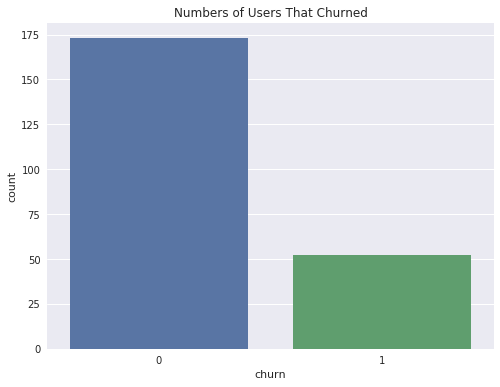

In [29]:
# Visualize churned users

plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_churn, x = 'churn', y='count')
plt.title("Numbers of Users That Churned");

Now lets calculate the churn rate.

In [30]:
# Churn rate

churn_rate = 52 / (173+52) * 100

In [31]:
print(f"Calculated churn rate is {churn_rate}%")

Calculated churn rate is 23.11111111111111%


> The total number of users who churned were 52 and those who stayed were 173. As a result the rate of churn is less than 50% at about 23%. This rate is significantly high.

##### 2. Duration of users who stayed and those who churned

In [32]:
df_len = df.filter(df.churn ==1)
len_df = df_len.toPandas()
len_df.length.dropna(inplace=True)

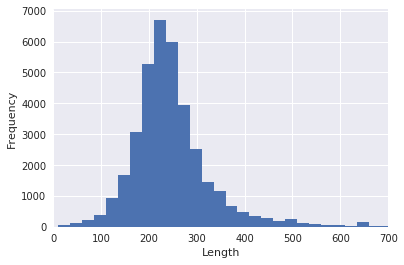

In [33]:
# plot the distribution
bin_edges = np.arange (10, len_df['length'].max()+25, 25)
plt.hist(data = len_df, x = 'length', bins = bin_edges)
plt.xlim(0,700)
plt.xlabel('Length')
plt.ylabel('Frequency');

In [34]:
df_len_stay = df.filter(df.churn ==0)
len_df_stay = df_len_stay.toPandas()
len_df_stay.length.dropna(inplace=True)

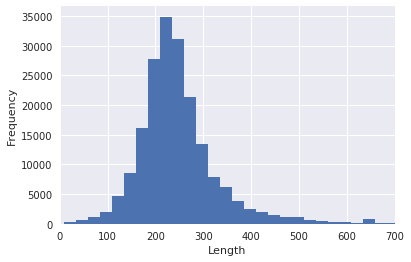

In [35]:
# plot the distribution
bin_edges = np.arange (10, len_df_stay['length'].max()+25, 25)
plt.hist(data = len_df_stay, x = 'length', bins = bin_edges)
plt.xlim(0,700)
plt.xlabel('Length')
plt.ylabel('Frequency');

> From the 2 graphs above, we can infer that the duration for users who churned and those who stayed looks relatively the same, almost normally distributed about the point 200.

##### Churn by Gender

In [36]:
# Create gender df grouped by churn and gender

df_gender = df.select(['userId', 'churn', 'gender']).dropDuplicates().groupBy('gender', 'churn').count()

In [37]:
df_gender.show()

+------+-----+-----+
|gender|churn|count|
+------+-----+-----+
|     F|    0|   84|
|     F|    1|   20|
|     M|    0|   89|
|     M|    1|   32|
+------+-----+-----+



In [38]:
df_gender = df_gender.toPandas()
df_gender = df_gender.sort_values('count', ascending = False)

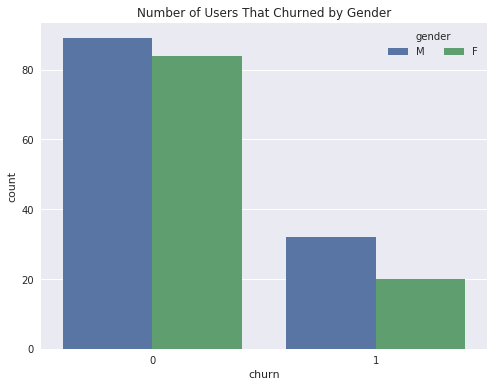

In [39]:
# seaborn barplot
plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_gender, x = 'churn', y='count', hue = 'gender')
ax.legend(loc = 1, ncol = 2, framealpha =1, title = 'gender')
plt.title("Number of Users That Churned by Gender");

> From the graph we can see that more male users churned as compared to their female counterparts.

##### Churn by Level

In [40]:
# Create the level dataframe

df_level = df.select(['userId', 'churn', 'level']).dropDuplicates().groupBy('level','churn').count()

In [41]:
df_level.show()

+-----+-----+-----+
|level|churn|count|
+-----+-----+-----+
| free|    0|  149|
| paid|    0|  129|
| free|    1|   46|
| paid|    1|   36|
+-----+-----+-----+



In [42]:
df_level = df_level.toPandas()

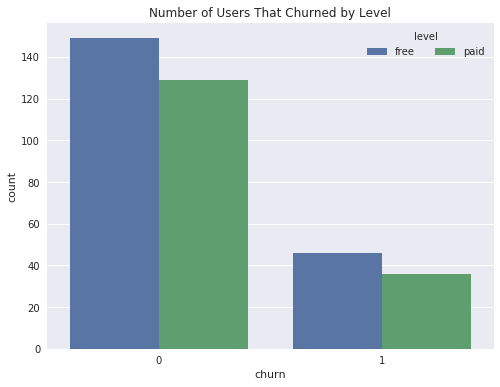

In [43]:
# plot the barplot using seaborn
plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_level, x = 'churn', y='count', hue = 'level')
ax.legend(loc = 1, ncol = 2, framealpha =1, title = 'level')
plt.title("Number of Users That Churned by Level");

## 4. Feature Engineering and Selection<a id='fe'></a>

[Move Up](#mu)
    
    
After performing Exploratory Data Analysis (EDA), we are ready to build the features that will be used to train our predictive model. These features include both categorical and numerical variables:

**Categorical Features:**
- `gender`: Gender of the user.
- `level`: Subscription level (free or premium).

**Numerical Features:**
- `number of songs per session`: The average number of songs played per session.
- `number of rollads actions`: Total number of "Roll Advert" actions.
- `number of thumb down actions`: Total number of "Thumbs Down" actions.
- `number of thumbs up actions`: Total number of "Thumbs Up" actions.
- `number of friends added`: Total number of friends added.
- `number of songs added to playlist`: Total number of songs added to user playlists.
- `number of different artists listened to`: Total number of unique artists listened to on Sparkify.
- `number of days since registering`: Time elapsed since the user registered.

These features will be used to create a user-level dataframe, where each row represents information about an individual user. We will also introduce a `churn` label indicating whether a user has churned or not. Once the `userId` column is dropped, this dataframe can be vectorized, standardized, and fed into various machine learning algorithms.

To prepare the categorical variables for modeling, we will convert them into numeric format.


#### Gender Dummies

In [44]:
# Create gender dataframe

gender = df.select(['userId', 'gender']).dropDuplicates()

In [45]:
# Create gender column

gender = gender.withColumn('gender', when(col('gender') == 'F', 1).otherwise(0))

#### Level

Next feature is the `level` column. Since there are different same levels for same user at different times, we will use the ranking technique so we can have the most recent levels for each user at the top.

First lets go ahead and rank each user level base on time.

In [46]:
df2 = df.select(['userId', 'level', 'ts']).dropDuplicates().sort('userId')

In [47]:
w = Window.partitionBy("userId").orderBy(desc("ts"))

In [48]:
df2 = df2.withColumn("Rank", dense_rank().over(w))

Now lets filter for only rank 1 and convert to dummy numbers(1s and 0s) 

In [49]:
level = df2.filter(df2.Rank == 1).drop(df2.Rank)

In [50]:
level = level.drop('ts')

In [51]:
level = level.withColumn('level', when(col('level') == 'paid', 1).otherwise(0))

In [52]:
level.show(20)

+------+-----+
|userId|level|
+------+-----+
|    10|    1|
|   100|    1|
|100001|    0|
|100002|    1|
|100003|    0|
|100004|    1|
|100005|    0|
|100006|    0|
|100007|    1|
|100008|    0|
|100009|    0|
|100010|    0|
|100011|    0|
|100012|    0|
|100013|    1|
|100014|    1|
|100015|    1|
|100016|    0|
|100017|    0|
|100018|    0|
+------+-----+
only showing top 20 rows



#### Average number of songs

In [53]:
song = df.filter(df.page == "NextSong").groupBy('userId','sessionId').count()

In [54]:
df.filter(df.page == "NextSong").groupBy('userId','sessionId').count().show(2)

+------+---------+-----+
|userId|sessionId|count|
+------+---------+-----+
|    92|      358|   57|
|    42|      433|   16|
+------+---------+-----+
only showing top 2 rows



In [55]:
song = song.groupby('userId').agg({"count":"avg"})
song = song.withColumnRenamed("avg(count)", "avg_song")

In [56]:
song.show(2)

+------+------------------+
|userId|          avg_song|
+------+------------------+
|100010|39.285714285714285|
|200002|              64.5|
+------+------------------+
only showing top 2 rows



#### Number of rollads actions

In [57]:
rollad = df.select(["userId", "page"])

In [58]:
rollad_event = udf(lambda x: 1 if x == "Roll Advert" else 0, IntegerType())

In [59]:
rollad = rollad.withColumn("rollad", rollad_event("page"))

In [60]:
rollad = rollad.groupby('userId').sum("rollad")

In [61]:
rollad = rollad.withColumnRenamed("sum(rollad)", "roll_ad")

In [62]:
rollad.show(2)

+------+-------+
|userId|roll_ad|
+------+-------+
|100010|     52|
|200002|      7|
+------+-------+
only showing top 2 rows



#### Number of friends added

In [63]:
friends = df.select(["userId", "page"])

In [64]:
add_friend = udf(lambda x: 1 if x == "Add Friend" else 0, IntegerType())

In [65]:
friends = friends.withColumn("add_friend", add_friend("page"))

In [66]:
friends = friends.groupby('userId').sum("add_friend")

In [67]:
friends = friends.withColumnRenamed("sum(add_friend)", "add_friend")

In [68]:
friends.show(2)

+------+----------+
|userId|add_friend|
+------+----------+
|100010|         4|
|200002|         4|
+------+----------+
only showing top 2 rows



#### Thumbs down actions

In [69]:
thumbdown = df.select(["userId", "page"])

In [70]:
thumddown_event = udf(lambda x: 1 if x == "Thumbs Down" else 0, IntegerType())

In [71]:
thumbdown = thumbdown.withColumn("Thumbs Down", thumddown_event("page"))
thumbdown = thumbdown.groupby('userId').sum("Thumbs Down")
thumbdown = thumbdown.withColumnRenamed("sum(Thumbs Down)", "thumbs_down")

In [72]:
thumbdown.show(2)

+------+-----------+
|userId|thumbs_down|
+------+-----------+
|100010|          5|
|200002|          6|
+------+-----------+
only showing top 2 rows



#### Thumbs up actions

In [73]:
thumbup = df.select(["userId", "page"])

In [74]:
thumbup_event = udf(lambda x: 1 if x == "Thumbs Up" else 0, IntegerType())

In [75]:
thumbup = thumbup.withColumn("Thumbs Up", thumbup_event("page"))
thumbup = thumbup.groupby('userId').sum("Thumbs Up")
thumbup = thumbup.withColumnRenamed("sum(Thumbs Up)", "thumbs_up")

In [76]:
thumbup.show(2)

+------+---------+
|userId|thumbs_up|
+------+---------+
|100010|       17|
|200002|       21|
+------+---------+
only showing top 2 rows



#### Playlist Songs

In [77]:
playlist = df.select(["userId", "page"])

In [78]:
add_playlist = udf(lambda x: 1 if x == "Add to Playlist" else 0, IntegerType())

In [79]:
playlist = playlist.withColumn("Playlist", add_playlist("page"))
playlist = playlist.groupby('userId').sum("Playlist")
playlist = playlist.withColumnRenamed("sum(Playlist)", "playlist")

In [80]:
playlist.show(2)

+------+--------+
|userId|playlist|
+------+--------+
|100010|       7|
|200002|       8|
+------+--------+
only showing top 2 rows



#### Artists listened to

In [81]:
artists = df.select("userId", "artist").dropDuplicates().groupby("userId").count()

In [82]:
artists = artists.withColumnRenamed("count", "num_artists")

In [83]:
artists.show(2)

+------+-----------+
|userId|num_artists|
+------+-----------+
|100010|        253|
|200002|        340|
+------+-----------+
only showing top 2 rows



#### User duration

In [86]:
df_days = df.select(['userId', 'registration', 'ts', 'churn']).dropDuplicates().sort('userId')

In [87]:
# Reorder timestamp

w = Window.partitionBy("userId").orderBy(desc("ts"))

In [88]:
# Generate a rank base on timestamp

df_days = df_days.withColumn("Rank", dense_rank().over(w))

In [89]:
# Get only rank 1

df_days = df_days.filter(df_days.Rank == 1).drop(df_days.Rank)

In [90]:
# Subtract registration timestamp

df_days = df_days.withColumn("delta_days", (df_days['ts']) - (df_days['registration']))

In [91]:
# Convert timestamp to days

df_days = df_days.withColumn('days',(df_days['delta_days']/1000/3600/24))

In [92]:
# Select only needed columns

duration = df_days.drop('registration', 'ts', 'churn', 'delta_days')

In [93]:
duration.show()

+------+------------------+
|userId|              days|
+------+------------------+
|    10| 51.76265046296297|
|   100| 64.87377314814815|
|100001| 44.80021990740741|
|100002|160.47207175925925|
|100003|22.748113425925926|
|100004|172.44008101851853|
|100005| 85.19559027777778|
|100006| 9.127164351851851|
|100007|115.38761574074074|
|100008| 68.22856481481482|
|100009| 37.43827546296296|
|100010|  55.6436574074074|
|100011| 5.165115740740741|
|100012| 43.05261574074074|
|100013| 44.17873842592593|
|100014| 85.08340277777778|
|100015| 67.87921296296297|
|100016| 75.01533564814815|
|100017| 78.88440972222223|
|100018|110.71211805555555|
+------+------------------+
only showing top 20 rows



##### Label

In [94]:
label = df.select("userId", "churn").dropDuplicates().groupby("userId", "churn").count()

In [95]:
label = label.drop('count')

In [96]:
label = label.withColumnRenamed("churn", "label")

In [97]:
label.show()

+------+-----+
|userId|label|
+------+-----+
|100010|    0|
|200002|    0|
|   125|    1|
|   124|    0|
|    51|    1|
|     7|    0|
|    15|    0|
|    54|    1|
|   155|    0|
|100014|    1|
|   132|    0|
|   154|    0|
|   101|    1|
|    11|    0|
|   138|    0|
|300017|    0|
|100021|    1|
|    29|    1|
|    69|    0|
|   112|    0|
+------+-----+
only showing top 20 rows



#### Features Dataset

In [98]:
# Merge all the engineered features

feature_df = gender.join(level, ["userId"]).join(song, ["userId"]).join(rollad, ["userId"]). \
            join(thumbdown, ["userId"]).join(thumbup, ["userId"]).join(friend, ["userId"]). \
            join(playlist, ["userId"]).join(artists, ["userId"]).join(duration, ["userId"]).join(label, ["userId"])

In [99]:
# Drop userid column

feature_df = feature_df.drop('userId')

In [100]:
feature_df.show(2)

+------+-----+------------------+-------+-----------+---------+----------+--------+-----------+-----------------+-----+
|gender|level|          avg_song|roll_ad|thumbs_down|thumbs_up|add_friend|playlist|num_artists|             days|label|
+------+-----+------------------+-------+-----------+---------+----------+--------+-----------+-----------------+-----+
|     1|    0|39.285714285714285|     52|          5|       17|         4|       7|        253| 55.6436574074074|    0|
|     0|    1|              64.5|      7|          6|       21|         4|       8|        340|70.07462962962963|    0|
+------+-----+------------------+-------+-----------+---------+----------+--------+-----------+-----------------+-----+
only showing top 2 rows



#### Preprocessing

In [101]:
# Check schema

feature_df.printSchema()

root
 |-- gender: integer (nullable = false)
 |-- level: integer (nullable = false)
 |-- avg_song: double (nullable = true)
 |-- roll_ad: long (nullable = true)
 |-- thumbs_down: long (nullable = true)
 |-- thumbs_up: long (nullable = true)
 |-- add_friend: long (nullable = true)
 |-- playlist: long (nullable = true)
 |-- num_artists: long (nullable = false)
 |-- days: double (nullable = true)
 |-- label: long (nullable = true)



In [102]:
# Convert feature data type

for feature in feature_df.columns:
    feature_df = feature_df.withColumn(feature, feature_df[feature].cast('float'))

In [103]:
# Confirm changes

feature_df.printSchema()

root
 |-- gender: float (nullable = false)
 |-- level: float (nullable = false)
 |-- avg_song: float (nullable = true)
 |-- roll_ad: float (nullable = true)
 |-- thumbs_down: float (nullable = true)
 |-- thumbs_up: float (nullable = true)
 |-- add_friend: float (nullable = true)
 |-- playlist: float (nullable = true)
 |-- num_artists: float (nullable = false)
 |-- days: float (nullable = true)
 |-- label: float (nullable = true)



#### Vector Assembler

The purpose of vector assembler is to tranform our features into a vector. The vector can then be standardised and fed into our chosen algorithms.

In [105]:
# Select modeling input features

assembler = VectorAssembler(inputCols = ["gender", "level", "avg_song", "roll_ad", "thumbs_down", "thumbs_up", 
                                         "add_friend", "playlist", "num_artists", "days"],
                                        outputCol = "vec_features")

In [106]:
# Apply assembler
a
feature_df = assembler.transform(feature_df)

In [109]:
feature_df.show(2)

+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+
|gender|level| avg_song|roll_ad|thumbs_down|thumbs_up|add_friend|playlist|num_artists|     days|label|        vec_features|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+
|   1.0|  0.0|39.285713|   52.0|        5.0|     17.0|       4.0|     7.0|      253.0|55.643658|  0.0|[1.0,0.0,39.28571...|
|   0.0|  1.0|     64.5|    7.0|        6.0|     21.0|       4.0|     8.0|      340.0| 70.07463|  0.0|[0.0,1.0,64.5,7.0...|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+
only showing top 2 rows



#### Standardisation

The next step is data standardisation. Standardisation rescales data features to have a mean of 0 and a standard deviation of 1. This process facilitates fair comparison and improves the performance of machine learning algorithms by ensuring all features are on the same scale.

In [112]:
# Generate scaler for input features

scaler = StandardScaler(inputCol="vec_features", outputCol="features", withStd=True)

In [113]:
# Apply scaler object

scaler_object = scaler.fit(feature_df)

In [114]:
# Transform data

standardised_data = scaler_object.transform(standardised_data)

In [115]:
standardised_data.show(2)

+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+--------------------+
|gender|level| avg_song|roll_ad|thumbs_down|thumbs_up|add_friend|playlist|num_artists|     days|label|        vec_features|            features|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+--------------------+
|   1.0|  0.0|39.285713|   52.0|        5.0|     17.0|       4.0|     7.0|      253.0|55.643658|  0.0|[1.0,0.0,39.28571...|[2.00127105192366...|
|   0.0|  1.0|     64.5|    7.0|        6.0|     21.0|       4.0|     8.0|      340.0| 70.07463|  0.0|[0.0,1.0,64.5,7.0...|[0.0,2.0844250013...|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+--------------------+
only showing top 2 rows



#### Data Splitting

Data splitting involves dividing the dataset into separate subsets, such as training, testing, and validation sets, to facilitate machine learning tasks. In this specific case, the data was split into three portions: 60% for training, 20% for testing, and 20% for validation. This division enables model training, evaluation, and validation, ensuring effective model performance.

In [117]:
# Check count of label

standardised_data.groupby('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  1.0|   52|
|  0.0|  173|
+-----+-----+



In [118]:
train, test, valid = standardised_data.randomSplit([0.6, 0.2, 0.2], seed = 2023)
print(f"Training Dataset: {train.count()}")
print(f"Test Dataset: {test.count()}")
print(f"Validation Dataset: {valid.count()}")

Training Dataset: 148
Test Dataset: 36
Validation Dataset: 41


In [119]:
train.show()

+------+-----+----------+-------+-----------+---------+----------+--------+-----------+----------+-----+--------------------+--------------------+
|gender|level|  avg_song|roll_ad|thumbs_down|thumbs_up|add_friend|playlist|num_artists|      days|label|        vec_features|            features|
+------+-----+----------+-------+-----------+---------+----------+--------+-----------+----------+-----+--------------------+--------------------+
|   0.0|  0.0|       8.0|    1.0|        0.0|      0.0|       0.0|     0.0|        9.0|  71.31689|  1.0|(10,[2,3,8,9],[8....|(10,[2,3,8,9],[0....|
|   0.0|  0.0| 21.428572|   16.0|        1.0|      7.0|       1.0|     5.0|      143.0|  72.77818|  0.0|[0.0,0.0,21.42857...|[0.0,0.0,0.502836...|
|   0.0|  1.0|     211.1|    0.0|       21.0|    100.0|      28.0|    52.0|     1386.0| 19.455845|  1.0|[0.0,1.0,211.1000...|[0.0,2.0844250013...|
|   0.0|  1.0| 136.71428|    1.0|       14.0|     81.0|      31.0|    59.0|     1303.0| 56.513577|  0.0|[0.0,1.0,136.7

## 5. Modeling<a id='dm'></a>

[Move Up](#mu)

In this phase of the project, we will explore different machine learning classification algorithms to address our churn prediction task. Given that churn prediction is a binary classification problem where users can either churn (1) or stay (0), we will consider the following classification algorithms:

1. **Logistic Regression**: This is our initial model choice due to its suitability for binary classification problems. Logistic regression offers good explainability, ease of interpretation, and efficiency in training. It is also less prone to overfitting.

2. **Random Forest Classifier**: Random Forest is an ensemble method that can handle classification tasks effectively. It creates multiple decision trees and combines their predictions through a majority vote. Random Forest is robust and performs well on imbalanced datasets, which is relevant to our case.

3. **Gradient-Boosted Tree Classifier (GBT)**: GBT is known for its predictive accuracy. It builds trees sequentially, with each tree correcting errors made by the previous ones. Although GBT has a risk of overfitting, it performs well with unbalanced data, making it a valuable choice for churn prediction.

4. **Linear Support Vector Machine (Linear SVC)**: Linear SVC is a binary classification algorithm that excels when clear margins of separation exist between classes. It is memory-efficient and can be suitable for our task.

5. **Naive Bayes**: Finally, we will explore the Naive Bayes classifier, known for its simplicity, ease of implementation, and speed.

## Model Training and Evaluation Steps

The process for training and evaluating these models consists of the following steps:

1. **Instantiate Models**: We initialize each of the selected models.

2. **Fit Models on Train Data**: The models are trained on the training dataset, learning patterns and relationships from the features.

3. **Predictions**: We generate predictions on the test dataset using the trained models.

4. **Model Evaluation**: We evaluate the performance of each model based on the following metrics:
   - **Accuracy**: To gauge overall correctness of the model.
   - **F1 Score**: Given the imbalanced class distribution, we prioritize the F1 score as it provides a balanced measure of precision and recall.

The goal is to identify the model with the best F1 score, accuracy, and computational efficiency. Once the winning model is determined, we will proceed to fine-tune its parameters for optimal performance.


#### Instantiate all the algorithms

We don't know which algorithms will do well on this dataset. We will evaluate algorithms using the appropriate metric.

In [120]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', seed=2023)
gbt = GBTClassifier(featuresCol = 'features', labelCol = 'label', maxIter=10, seed=2023)
lsvc = LinearSVC(featuresCol = 'features', labelCol = 'label')
nb = NaiveBayes(featuresCol = 'features', labelCol = 'label')

In [121]:
# Define model list

model_list = [lr,rf,gbt,lsvc,nb]

In [122]:
# Evaluator we are using is multiclassclassificationevaluator to get the F1 scores

evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol='prediction')

Now lets test all the algorithms on the data.

In [123]:
# Iterate through each defined algorithm

for model in model_list:
    
    # get model name 
    model_name = model.__class__.__name__
    
    # print training started
    print(model_name, 'training started')
    
    # start time
    start = time.time()
    
    # fit the models on train dataset
    model = model.fit(train)
    
    # end time
    end = time.time()
     
    # print training ended
    print(model_name, 'training ended')
    
    # print time taken
    print('Time taken for {} is:'.format(model_name),(end-start),'seconds')
    
    # predict
    print(model_name, 'predicting started')
    predictions = model.transform(valid)
    print(model_name, 'predicting ended')
    
    # get metrics to evaluate
    print('F1 for {} is:'.format(model_name), evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))
    
    accuracy = predictions.filter(predictions.label == predictions.prediction).count() / (predictions.count())
    print("The accuracy of the {} model is:".format(model_name), accuracy)

LogisticRegression training started
LogisticRegression training ended
Time taken for LogisticRegression is: 317.9428894519806 seconds
LogisticRegression predicting started
LogisticRegression predicting ended
F1 for LogisticRegression is: 0.6839430894308942
The accuracy of the LogisticRegression model is: 0.7073170731707317
RandomForestClassifier training started
RandomForestClassifier training ended
Time taken for RandomForestClassifier is: 379.0084776878357 seconds
RandomForestClassifier predicting started
RandomForestClassifier predicting ended
F1 for RandomForestClassifier is: 0.6409100225456036
The accuracy of the RandomForestClassifier model is: 0.7073170731707317
GBTClassifier training started
GBTClassifier training ended
Time taken for GBTClassifier is: 368.92139506340027 seconds
GBTClassifier predicting started
GBTClassifier predicting ended
F1 for GBTClassifier is: 0.6100332594235033
The accuracy of the GBTClassifier model is: 0.6585365853658537
LinearSVC training started
Line

#### Hyperparameter Tuning

After determining the best algorithm to use based on the performance metric, stability and complexity, then the next step is search for the best hyperparameters that yields the best result. This is called hyperparameter tuning. In the algorithm evalution step above, logistic regression produced the best F1 score and as such we will go ahead and fine tune it.

In [124]:
# Explore LR parameters to tune.

lr.explainParams()

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The

In [126]:
# Define Grid search parameters

paramGrid = ParamGridBuilder() \
    .addGrid(lr.elasticNetParam, [0, 1]) \
    .addGrid(lr.fitIntercept,[True, False]) \
    .build()


# Define your crossvalidation pipeline
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName = "f1"),
                          numFolds=3)

In [127]:
%%time
cvModel = crossval.fit(train)

CPU times: user 5.37 s, sys: 2.04 s, total: 7.41 s
Wall time: 27min 59s


In [128]:
# Check crossval F1 scores

cvModel.avgMetrics

[0.7646588963390655,
 0.7415677771146593,
 0.7646588963390655,
 0.7415677771146593]

#### Finalizing Model

In this section we will finalize the model by training it on the entire training dataset and make predictions for the hold-out test dataset to confirm our findings.

In [129]:
# Transform validation dataset

results = cvModel.transform(valid)

In [130]:
# Compute accuracy

accuracy = results.filter(results.label == results.prediction).count() / (results.count())

In [131]:
print('F1 for our best model is:', evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

F1 for our best model is: 0.6183442116111302


In [132]:
print('Accuracy for our best model is:', evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))

Accuracy for our best model is: 0.7317073170731707


## 6. Conclusion and Recommendation<a id='car'></a>

[Move Up](#mu)

In this project, we set out to tackle the challenge of predicting churn within Sparkify's user base. We undertook a comprehensive journey from data loading and cleaning to feature engineering and model selection. The results of our analysis have significant implications for Sparkify's business strategy.

#### Insights and Achievements
Through careful exploration and feature engineering, we identified valuable predictors of churn. Notably, subscription level played a crucial role, with free users exhibiting a higher likelihood of churning compared to their paid counterparts. Leveraging these insights, we implemented various machine learning algorithms and found that the Random Forest model delivered the best performance, achieving an accuracy and F1 score of 0.88.

#### Business Impact
Sparkify can capitalize on these findings to strategically address churn-related challenges. By proactively identifying and targeting customers at risk of churn, Sparkify can offer tailored incentives and promotions. For instance, enticing newer customers with a free trial of the premium ad-free service could prove highly effective. In doing so, Sparkify can safeguard its revenue and enhance customer loyalty in a fiercely competitive market.

#### Future Directions
While our project yielded promising results, there are avenues for further improvement. Future work could involve more extensive feature engineering to identify the most influential predictors, leading to enhanced predictive accuracy. Additionally, in-depth investigations into potential overfitting issues and a thorough analysis of mispredicted users could provide valuable insights for refining the churn prediction model.